<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/openclassroom-datascience-tools/An_nettoyage_openclassromm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

### Load the data

In [28]:
operation = pd.read_csv('https://s3.eu-west-1.amazonaws.com/course.oc-static.com/courses/7410486/operations.csv')

### Explore the data

**First five lines**

In [29]:
operation.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


**Data type**

In [30]:
operation.dtypes

date_operation     object
libelle            object
montant           float64
solde_avt_ope     float64
categ              object
dtype: object

**Changing the type of date_naissance column**

In [31]:
operation['date_operation'] = pd.to_datetime(operation['date_operation'])

In [32]:
# Review the data type
operation.dtypes

date_operation    datetime64[ns]
libelle                   object
montant                  float64
solde_avt_ope            float64
categ                     object
dtype: object

### Missing Values

In [33]:
# Number of null value per column
isnull = operation.isnull().sum()

In [34]:
operation.isnull().sum()[isnull > 0]

montant    2
categ      1
dtype: int64

In [35]:
operation.loc[operation['montant'].isnull(), :]

,date_operation,libelle,montant,solde_avt_ope,categ
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
269,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE


In [36]:
data = operation.copy()
data

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


In [37]:
data.loc[data['montant'].isnull(), :]

,date_operation,libelle,montant,solde_avt_ope,categ
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
269,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE


In [38]:
isnull

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64

In [39]:
montant_na = data.loc[data['montant'].isnull(), :]

In [40]:
montant_na

,date_operation,libelle,montant,solde_avt_ope,categ
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
269,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE


In [41]:
for index in montant_na.index:
  data.loc[index, 'montant'] = (data.loc[index + 1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope'])

In [42]:
data.loc[montant_na.index, :]

,date_operation,libelle,montant,solde_avt_ope,categ
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,-26.58,4667.19,COURSES
269,2023-09-11,CARTE XX XX XX XX,-12.00,3401.93,AUTRE


**Null Catégorie**

In [43]:
data.loc[data.categ.isnull()]

,date_operation,libelle,montant,solde_avt_ope,categ
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN


On se refère au libellé pour trouver la catégorie correspondant

In [44]:
data.loc[data.libelle == 'PRELEVEMENT XX TELEPHONE XX XX']

,date_operation,libelle,montant,solde_avt_ope,categ
8,2023-04-05,PRELEVEMENT XX TELEPHONE XX XX,-7.02,2056.02,FACTURE TELEPHONE
62,2023-05-09,PRELEVEMENT XX TELEPHONE XX XX,-7.02,4090.10,FACTURE TELEPHONE
102,2023-06-07,PRELEVEMENT XX TELEPHONE XX XX,-6.38,4688.91,FACTURE TELEPHONE
156,2023-07-06,PRELEVEMENT XX TELEPHONE XX XX,-36.48,3295.68,NaN
204,2023-08-07,PRELEVEMENT XX TELEPHONE XX XX,-7.46,3751.73,FACTURE TELEPHONE
260,2023-09-05,PRELEVEMENT XX TELEPHONE XX XX,-6.38,3453.96,FACTURE TELEPHONE
308,2023-10-06,PRELEVEMENT XX TELEPHONE XX XX,-13.58,2413.58,FACTURE TELEPHONE


On se voit que la catégorie pourra donc être ici **FACTURE TELEPHONE**

In [45]:
data.loc[data.categ.isnull(), 'categ'] = 'FACTURE TELEPHONE'

In [46]:
data

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


In [47]:
data.isnull().sum()

date_operation    0
libelle           0
montant           0
solde_avt_ope     0
categ             0
dtype: int64

Nous avons maintenant aucune valeur nulle

### Doublons

In [48]:
data.duplicated().sum()

1

In [49]:
data.loc[data.duplicated(keep=False)]

,date_operation,libelle,montant,solde_avt_ope,categ
43,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES
44,2023-04-25,CARTE XX XX LES ANCIENS ROBINSON XX,-32.67,3647.67,COURSES


In [50]:
data.drop_duplicates(inplace=True)

In [51]:
data.loc[data.duplicated(keep=False)]

,date_operation,libelle,montant,solde_avt_ope,categ


Nous avons maintenant aucun individu dupliqué

### Outliers

In [52]:
data.describe()

,montant,solde_avt_ope
count,308.000000,308.000000
mean,-45.782013,3395.301071
std,872.818105,667.109412
min,-15000.000000,1416.810000
25%,-20.447500,3010.737500
50%,-9.600000,3452.465000
75%,-2.715000,3787.232500
max,1071.600000,4709.310000


In [53]:
data

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE XX XX XX XX XX XX,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE XX XX XX XX,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK XX XX XX XX,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE XX XX CHEZ LUC XX,-10.00,2423.58,RESTAURANT


In [54]:
data.loc[data['montant'] == -15000]

,date_operation,libelle,montant,solde_avt_ope,categ
199,2023-08-03,CARTE XX XX XX XX,-15000.0,3797.35,AUTRE


In [60]:
i = data.loc[data['montant'] == -15000].index[0] # Index de la transaction au montant à -15000
i

199

In [61]:
# Trouver les lignes avant et après cette transaction à -15000
data.loc[i - 1:i+1, :]

,date_operation,libelle,montant,solde_avt_ope,categ
198,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
199,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
200,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


In [62]:
# Remplacer la valeur du montant équivalent à -15000
data.loc[i, 'montant'] = -14.5
data.loc[i, :]

date_operation    2023-08-03 00:00:00
libelle             CARTE XX XX XX XX
montant                         -14.5
solde_avt_ope                 3797.35
categ                           AUTRE
Name: 199, dtype: object

In [63]:
data.loc[i-1:i+1, :]

,date_operation,libelle,montant,solde_avt_ope,categ
198,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
199,2023-08-03,CARTE XX XX XX XX,-14.50,3797.35,AUTRE
200,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


# Analyse et visualisation

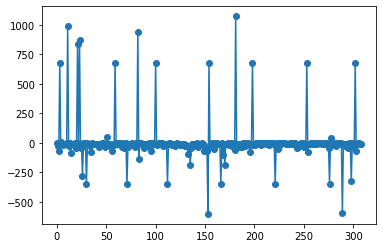

In [67]:
data.montant.plot(marker='o')

In [68]:
data.montant[(data.montant < 10) | (data.montant >-5)]

0       -1.44
1      -24.00
2      -73.00
3      676.00
4        4.80
        ...  
304    -10.64
305     -4.80
306     -1.92
307    -10.00
308    -13.58
Name: montant, Length: 308, dtype: float64

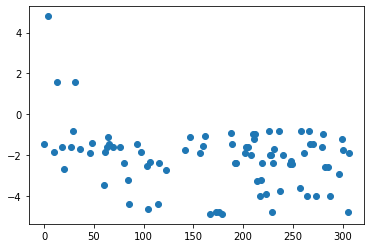

In [77]:
data.montant[(data.montant < 10) & (data.montant >-5)].plot(marker='o', style='o')

### Variable qualitative

In [78]:
data.head()

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON XX XX XX XX XX XX XX,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE XX XX RAPT XX,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE XX XX RAPT XX,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT XX XX XX XX XX XX,4.80,2092.81,AUTRE


In [79]:
data['categ'].value_counts()

AUTRE                  212
COURSES                 39
TRANSPORT               21
RESTAURANT              16
FACTURE TELEPHONE        7
COTISATION BANCAIRE      7
LOYER                    6
Name: categ, dtype: int64

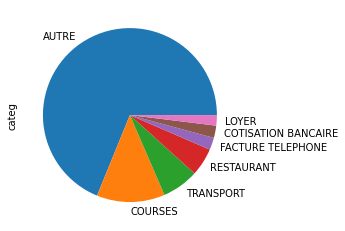

In [82]:
data['categ'].value_counts().plot(kind='pie')

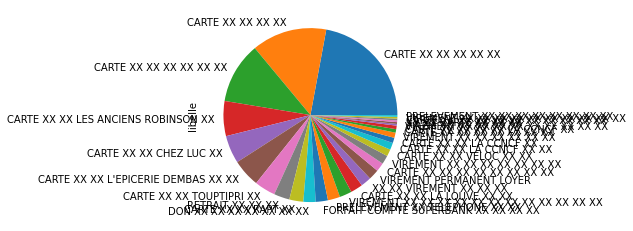

In [87]:
data.libelle.value_counts().plot(kind='pie', rot=-90)

In [89]:
data.libelle.value_counts()

CARTE XX XX XX XX XX                            68
CARTE XX XX XX XX                               43
CARTE XX XX XX XX XX XX                         35
CARTE XX XX LES ANCIENS ROBINSON XX             20
CARTE XX XX CHEZ LUC XX                         16
CARTE XX XX L'EPICERIE DEMBAS XX XX             16
CARTE XX XX TOUPTIPRI XX                        12
RETRAIT XX XX XX                                 9
CARTE XX XX RAPT XX                              8
DON XX XX XX XX XX XX XX                         7
FORFAIT COMPTE SUPERBANK XX XX XX XX             7
PRELEVEMENT XX TELEPHONE XX XX                   7
VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX     7
CARTE XX XX LA LOUVE XX XX                       7
XX XX VIREMENT XX XX XX                          6
VIREMENT PERMANENT LOYER                         6
CARTE XX XX XX XX XX XX XX XX                    5
VIREMENT XX XX XX XX XX XX XX                    5
CARTE XX XX VELOC XX XX                          4
CARTE XX XX LA CCNCF XX XX     

In [90]:
f = lambda x: x.replace('X', '').strip().replace('  ', '')

In [91]:
data['libelle'] = data.libelle.apply(f)

In [92]:
data['libelle'].value_counts()

CARTE                         155
VIREMENT                       23
CARTE LES ANCIENS ROBINSON     20
CARTE CHEZ LUC                 16
CARTE L'EPICERIE DEMBAS        16
CARTE TOUPTIPRI                12
CARTE LA CCNCF                  9
RETRAIT                         9
CARTE RAPT                      8
DON                             7
PRELEVEMENTTELEPHONE            7
FORFAIT COMPTE SUPERBANK        7
CARTE LA LOUVE                  7
VIREMENT PERMANENT LOYER        6
CARTE VELOC                     4
                                1
PRELEVEMENT                     1
Name: libelle, dtype: int64

In [94]:
data.libelle = data.libelle.str.replace("PRELEVEMENTTELEPHONE", "PRELEVEMENT TELEPHONE")

In [95]:
data

,date_operation,libelle,montant,solde_avt_ope,categ
0,2023-03-31,DON,-1.44,1515.25,AUTRE
1,2023-04-03,CARTE RAPT,-24.00,1513.81,TRANSPORT
2,2023-04-03,CARTE RAPT,-73.00,1489.81,TRANSPORT
3,2023-04-03,VIREMENT,676.00,1416.81,AUTRE
4,2023-04-03,VIREMENT,4.80,2092.81,AUTRE
...,...,...,...,...,...
304,2023-10-05,CARTE,-10.64,2440.94,AUTRE
305,2023-10-05,CARTE,-4.80,2430.30,AUTRE
306,2023-10-06,FORFAIT COMPTE SUPERBANK,-1.92,2425.50,COTISATION BANCAIRE
307,2023-10-06,CARTE CHEZ LUC,-10.00,2423.58,RESTAURANT


In [96]:
data.libelle.value_counts()

CARTE                         155
VIREMENT                       23
CARTE LES ANCIENS ROBINSON     20
CARTE CHEZ LUC                 16
CARTE L'EPICERIE DEMBAS        16
CARTE TOUPTIPRI                12
CARTE LA CCNCF                  9
RETRAIT                         9
CARTE RAPT                      8
DON                             7
PRELEVEMENT TELEPHONE           7
FORFAIT COMPTE SUPERBANK        7
CARTE LA LOUVE                  7
VIREMENT PERMANENT LOYER        6
CARTE VELOC                     4
                                1
PRELEVEMENT                     1
Name: libelle, dtype: int64

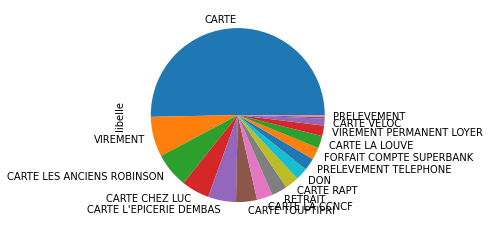

In [98]:
data.libelle.value_counts().plot.pie()

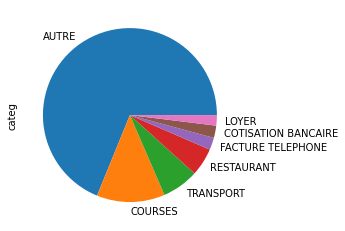

In [99]:
data['categ'].value_counts().plot.pie()

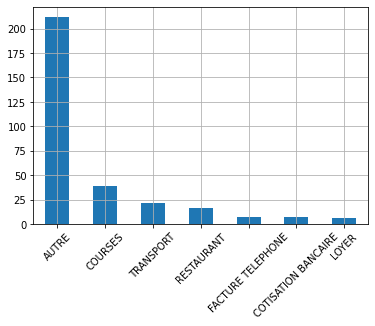

In [105]:
data['categ'].value_counts().plot(kind='bar', rot=45, grid=True)

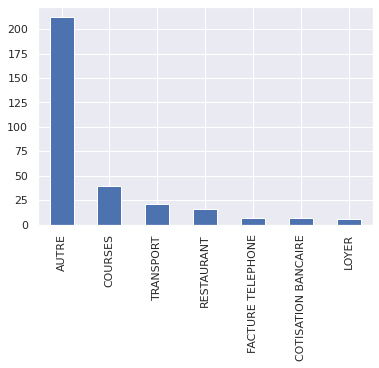

In [108]:
sns.set()
data['categ'].value_counts().plot(kind='bar', grid=True)
plt.show()

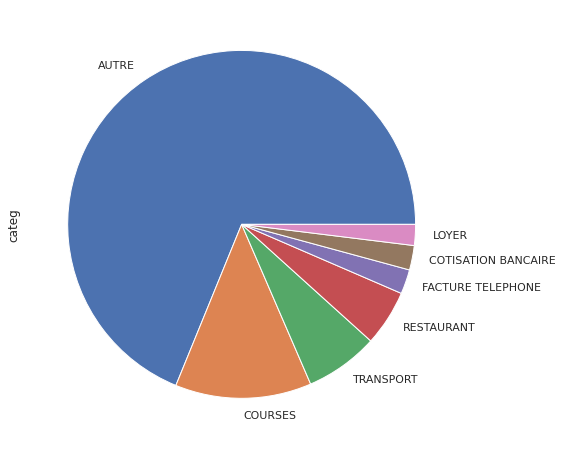

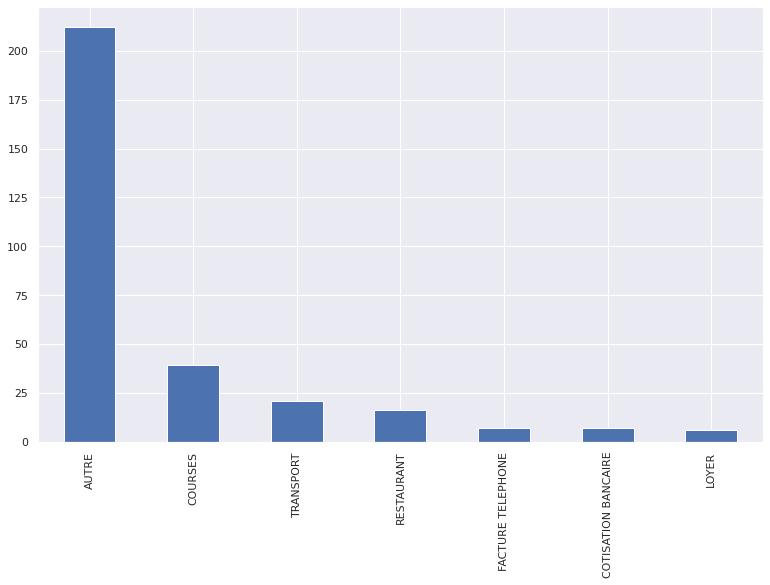

In [112]:
plt.figure(figsize=(13, 8))
data['categ'].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize=(13, 8))
data['categ'].value_counts().plot.bar()
plt.show()

In [144]:
def pourcent(serie):
  maximum = serie.sum()

  l = {'%.2f' % ((serie[x] / maximum) * 100) + '%': serie[x] for x in serie.index}
  return l

In [145]:
serie = data['categ'].value_counts()
pourcent(serie)

{'1.95%': 6, '12.66%': 39, '2.27%': 7, '5.19%': 16, '6.82%': 21, '68.83%': 212}

In [157]:
data_transform = pd.Series(pourcent(serie), name='Libelle')

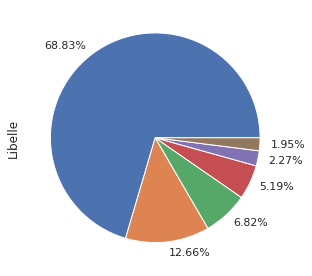

In [163]:
data_transform.plot.pie()
plt.tight_layout()

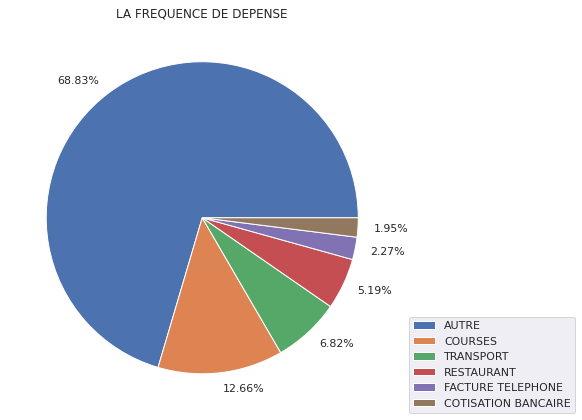

In [180]:
plt.figure(figsize=(10, 6))
data_transform.plot(kind='pie', legend=True, title='LA FREQUENCE DE DEPENSE', ylabel='')
plt.legend(data.categ.value_counts().index.values, loc=[1.03, 0])
plt.tight_layout()

In [179]:
data['categ'].value_counts()

AUTRE                  212
COURSES                 39
TRANSPORT               21
RESTAURANT              16
FACTURE TELEPHONE        7
COTISATION BANCAIRE      7
LOYER                    6
Name: categ, dtype: int64

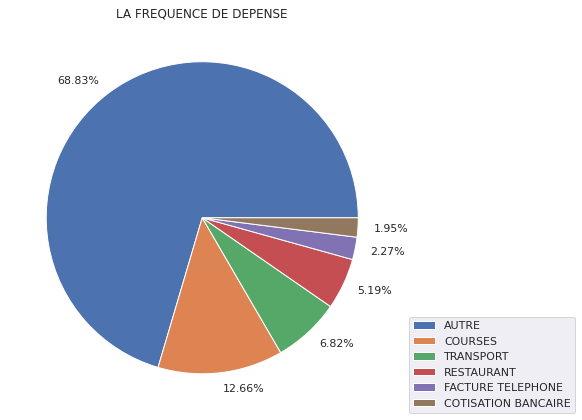

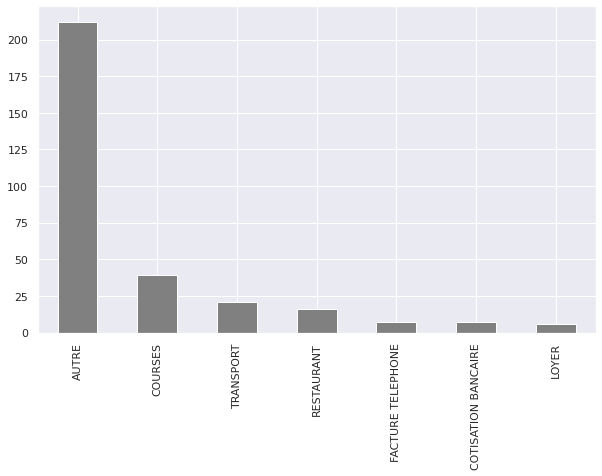

In [184]:
plt.figure(figsize=(10, 6))
data_transform.plot(kind='pie', legend=True, title='LA FREQUENCE DE DEPENSE', ylabel='')
plt.legend(data.categ.value_counts().index.values, loc=[1.03, 0])
plt.tight_layout()

plt.figure(figsize=(10, 6))
data['categ'].value_counts().plot.bar(color='grey')
plt.show()

### Variables qualitative

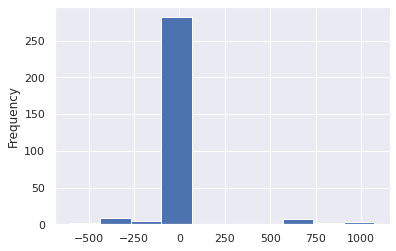

In [185]:
data['montant'].plot.hist()

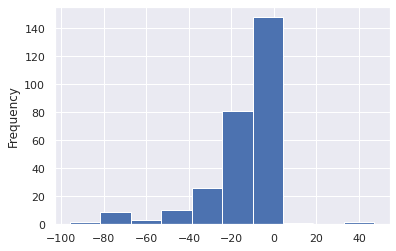

In [187]:
data.loc[data['montant'].abs() < 100, 'montant'].plot.hist()